# INSTRUCTIONS 

Because time is short, this homework is graded as mostly extra credit. 

You will score one point for using the correct file name, and one extra credit point for each model you run below.

Follow the prompts in the attached jupyter notebook. 
Download the data and place it in your working directory, or modify the path to upload it to your notebook. 
Add markdown cells to your analysis to include your solutions, comments, answers. 
**Add as many cells as you need**. For easy readability comment when possible.


**Title: 1985 Auto Imports Database**

Relevant Information:
   -- Description
      This data set consists of three types of entities: (a) the
      specification of an auto in terms of various characteristics, (b)
      its assigned insurance risk rating, (c) its normalized losses in use
      as compared to other cars.  The second rating corresponds to the
      degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.

      The third factor is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year.

   -- Note: Several of the attributes in the database could be used as a
            "class" attribute.

5. Number of Instances: 205

6. Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal

7. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota,volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

8. Missing Attribute Values: (denoted by "?")

## Note: It may be necessary to install the mlxtend package before the "plot_confusion_matrix". 

"conda install -c conda-forge mlxtend" should do it, or see: https://anaconda.org/conda-forge/mlxtend

As originally presented, the homework followed previous ones where the data wrangling was performed. The data wrangling is done for you here, and is not part of the homework.

In [2]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/73/da/d5d77a9a7a135c948dbf8d3b873655b105a152d69e590150c83d23c3d070/mlxtend-0.23.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12.3 MB/s eta 0:00:00a 0:00:01


In [59]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
from sklearn.dummy import DummyClassifier
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from numpy import mean
print ("done")

%matplotlib inline

done


In [60]:
#Read in data
df =pd.read_csv('auto_imports1.csv')

df.head()

,fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,cylinders,engine_size,bore,stroke,compression,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.4,10.0,102,5500,24,30,13950
4,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.4,8.0,115,5500,18,22,17450


# Data Wrangling

### Check what types of variables do you have in your data? Do you see anything that doesn't make sense? *Hint: horse power is  an object ?!*

In [61]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         201 non-null    object 
 11  stroke       201 non-null    object 
 12  compression  201 non-null    float64
 13  horse_power  201 non-null    object 
 14  peak_rpm     201 non-null    object 
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(5), int64(5), object(8)
memory usage: 2

### Replace '?' with None

In [62]:
df.replace({'?': None},inplace =True)

### Change the variables: bore, stroke, horse_power, peak_rpm to float64

In [63]:
## Your code here
df[['bore', 'stroke', 'horse_power', 'peak_rpm']] = df[['bore', 'stroke', 'horse_power', 'peak_rpm']].apply(pd.to_numeric, axis = 1)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         197 non-null    float64
 11  stroke       197 non-null    float64
 12  compression  201 non-null    float64
 13  horse_power  199 non-null    float64
 14  peak_rpm     199 non-null    float64
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(9), int64(5), object(4)
memory usage: 2

### Drop body,engine_type,cylinders columns and name the new dataframe df2

In [65]:
## Your code here
df2=df.drop(['body','engine_type','cylinders'], axis=1)
#df2=df.copy()

In [66]:
df2.head()

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,compression,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450


### Are there any null (NA) values in the data? If so, drop them and confirm they are gone

In [67]:
df2.isnull().sum()

fuel_type      0
wheel_base     0
length         0
width          0
heights        0
curb_weight    0
engine_size    0
bore           4
stroke         4
compression    0
horse_power    2
peak_rpm       2
city_mpg       0
highway_mpg    0
price          0
dtype: int64

In [68]:
df2=df2.dropna()

In [69]:
df2.isnull().sum()

fuel_type      0
wheel_base     0
length         0
width          0
heights        0
curb_weight    0
engine_size    0
bore           0
stroke         0
compression    0
horse_power    0
peak_rpm       0
city_mpg       0
highway_mpg    0
price          0
dtype: int64

### Replace ['gas', 'diesel'] string values with [0, 1]

In [70]:
df2.fuel_type.replace(to_replace=['gas', 'diesel'], value=[0, 1], inplace=True)
df2

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,compression,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470


### Define your X and y: your dependent variable is fuel_type, the rest of the variables are your independent variables

In [71]:
## your code goes here
X=df2.drop(['fuel_type'], axis=1)
y = df2['fuel_type']

### Split your data into training and testing set. Use test_size=0.3, random_state=746

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=746)

In [73]:
counter2 = Counter(y_test)
print(counter2)

Counter({0: 50, 1: 9})


## 1. Use Logistic regression to classify your data. Print/report your confusion matrix, classification report and AUC

In [74]:
#Code goes here
#logistic regression
# Create a logistic regression model
logistic_regression = LogisticRegression(solver='liblinear')

# Fit the model on the training data
logistic_regression.fit(X_train, y_train)

# Predict the labels of the testing data
y_prediction = logistic_regression.predict(X_test)

# Compute and print the confusion matrix
c_matrix = confusion_matrix(y_test, y_prediction)
print("CONFUSION MATRIX:")
print(c_matrix)

# Compute and print the classification report
c_report = classification_report(y_test, y_prediction)
print("CLASSIFICATION REPORT:")
print(c_report)

# Compute and print the AUC score
auc = roc_auc_score(y_test, y_prediction)
print("AUC SCORE:", auc)

CONFUSION MATRIX:
[[50  0]
 [ 0  9]]
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

AUC SCORE: 1.0


## 2. Use Naive Bayes to classify your data. Print/report your confusion matrix, classification report and AUC

In [75]:
#Code goes here
#Naive Bayes
# Create a Gaussian Naive Bayes model
naive_bayes = GaussianNB()

# Fit the model on the training data
naive_bayes.fit(X_train, y_train)

# Predict the labels of the testing data
y_prediction = naive_bayes.predict(X_test)

# Compute and print the confusion matrix
c_matrix = confusion_matrix(y_test, y_prediction)
print("Confusion Matrix:")
print(c_matrix)

# Compute and print the classification report
c_report = classification_report(y_test, y_prediction)
print("Classification Report:")
print(c_report)

# Compute and print the AUC score
auc = roc_auc_score(y_test, y_prediction)
print("AUC Score:", auc)


Confusion Matrix:
[[50  0]
 [ 0  9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

AUC Score: 1.0


## 3. Use a Support Vector Machine Classifier to classify your data.  Print/report your confusion matrix, classification report and AUC.

In [76]:
#Code goes here
# SVC
# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear')

# Fit the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Predict the labels of the testing data
y_prediction = svm_classifier.predict(X_test)

# Compute and print the confusion matrix
c_matrix = confusion_matrix(y_test, y_prediction)
print("Confusion Matrix:")
print(c_matrix)

# Compute and print the classification report
c_report = classification_report(y_test, y_prediction)
print("Classification Report:")
print(c_report)

# Compute and print the AUC score
auc = roc_auc_score(y_test, y_prediction)
print("AUC Score:", auc)


Confusion Matrix:
[[50  0]
 [ 0  9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

AUC Score: 1.0


## 4. Use KNN to classify your data. First find the optimal k and than run your classification. Print/report your confusion matrix, classification report and AUC

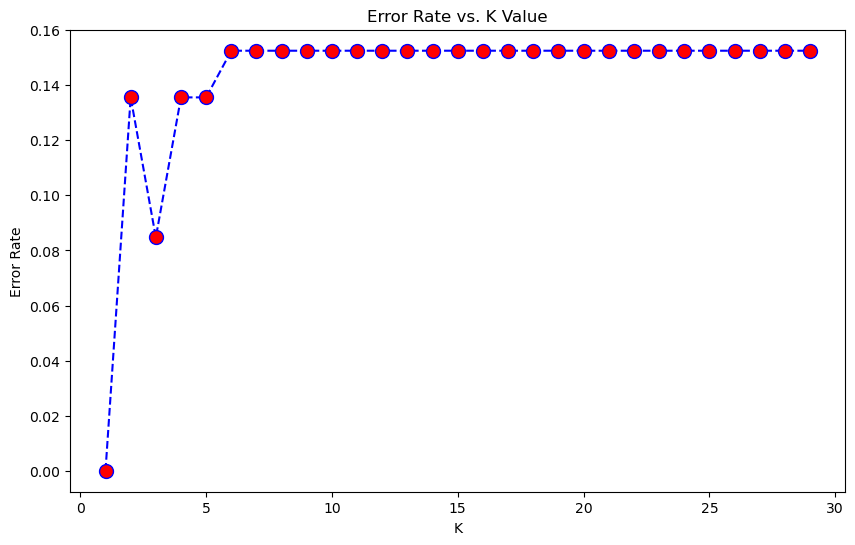

In [77]:
#Code goes here
#KNN - find optimal K
# Initialize an array that stores the error rates.
error_rates = []

for a in range(1, 30):
    k = a
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    error_rates.append(np.mean(y_test - preds))
    
#plot error rates against number of neighbors
plt.figure(figsize=(10, 6))
plt.plot(range(1,30),error_rates,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.savefig('knn.png')
plt.show()

In [78]:
#Code goes here
#Train classifier on the optimal k that we chose from the plot
# Create a KNN classifier with the optimal k value
knn_classifier = KNeighborsClassifier(n_neighbors= 3)

# Fit the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict the labels of the testing data
y_prediction = knn_classifier.predict(X_test)

# Compute and print the confusion matrix
c_matrix = confusion_matrix(y_test, y_prediction)
print("Confusion Matrix:")
print(c_matrix)

# Compute and print the classification report
c_report = classification_report(y_test, y_prediction)
print("Classification Report:")
print(c_report)

# Compute and print the AUC score
auc = roc_auc_score(y_test, y_prediction)
print("AUC Score:", auc)

Confusion Matrix:
[[49  1]
 [ 6  3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        50
           1       0.75      0.33      0.46         9

    accuracy                           0.88        59
   macro avg       0.82      0.66      0.70        59
weighted avg       0.87      0.88      0.86        59

AUC Score: 0.6566666666666666


## 5. Use Random Forest to classify your data. Print/report your confusion matrix, classification report and AUC

NOTE: This can take several seconds to train. Be patient.

In [79]:
#Code goes here
# random forest
# Create a Random Forest classifier with 100 trees
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=746)

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict the labels of the testing data
y_prediction = rf_classifier.predict(X_test)

In [80]:
#Random forest reports
# Compute and print the confusion matrix
c_matrix = confusion_matrix(y_test, y_prediction)
print("Confusion Matrix:")
print(c_matrix)

# Compute and print the classification report
c_report = classification_report(y_test, y_prediction)
print("Classification Report:")
print(c_report)

# Compute and print the AUC score
auc = roc_auc_score(y_test, y_prediction)
print("AUC Score:", auc)

Confusion Matrix:
[[50  0]
 [ 0  9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

AUC Score: 1.0


## 6. Which models performed best with this data set? Which performed worst? Which metric did you use for your criterion?

The model should, in general, have a low amount of false positives and false negatives, or high precision and recall values. When the class distribution is unbalanced, the F1-score is a useful metric to utilize because it accounts for both recall and precision. As a result, the classification model is performing well when the precision, recall, and F1-score values are at their greatest points. Yet, the accuracy of every model, with the exception of KNN, which has an accuracy of 0.88, is 1.00.


All the models except KNN with accuracy of 0.88 have 1.00 as the accuracy. Which can mean:

   1.The models are overfitting the training data: If the models are sophisticated and contain numerous                parameters, they may be overfitting the training data and failing to generalize well to new, unseen data.          This can also lead to over-optimistic evaluation outcomes on training and test data.
   2.The test data is too easy:If the test data is substantially similar to the training data, or if the 
   problem is  relatively simple and can be solved with a few rules, even simple models can produce excellent          classification results.
   3.There is a bug in the code: I see no bug here
      
It is important to note that perfect classification results on a test set are extremely unusual in practice and usually signal that there is a problem with the model or the data. To acquire a more accurate estimate of the model's performance, it's always a good idea to double-check the data and the model, and to consider utilizing more robust evaluation approaches, such as cross-validation or bootstrapping.

## 7. The target data (fuel_type) is imbalanced. Display a bar chart showing this imbalance.

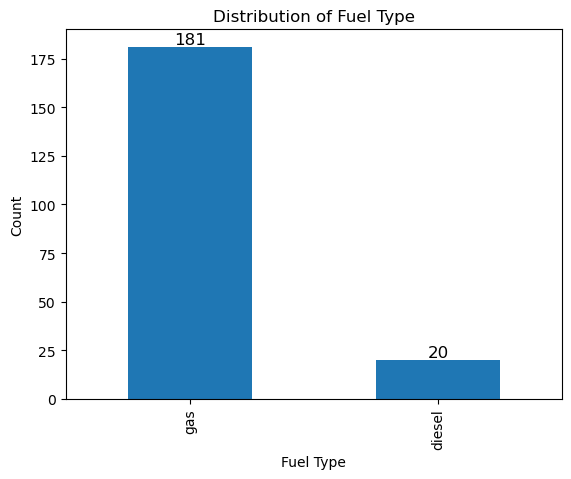

In [81]:
# Bar chart code goes here 
# get the count of each class in the fuel_type column
fuel_counts = df['fuel_type'].value_counts()

# plot a bar chart of the fuel type counts with counts displayed on top of each bar
ax = fuel_counts.plot(kind='bar')
plt.title('Distribution of Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')

# add counts on top of each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=12)

plt.show()

Yes, the dataset is unbalanced because the number of cases in the two classes differs significantly.In such instances, the classification model may be biased toward the majority class while underperforming on the minority class. This is why the classification model is incorrectly classifying. Diesel accounts for only 9% of the total statistics.

The majority of machine learning algorithms were built on the assumption of an equal number of samples for each class. Models have low predictive performance, particularly for minorities.

## 8. Fix the imbalanced nature of the data using one of the methods discussed in class. Re-run one of the "failed" classification methods with the balanced data set and see if you get better results.

In [82]:
#Fix imbalance. Code goes here.
from numpy import where
from sklearn.datasets import make_classification
from collections import Counter
from matplotlib import pyplot

# Generate an imbalanced classification dataset
X, y = make_classification(n_samples=400, n_features=14, weights=[0.5, 0.5], random_state=42)

In [83]:
# Print the count of each class
counter = Counter(y)
print(counter)

Counter({1: 202, 0: 198})


In [84]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### logistic regression model

In [85]:
# Create a logistic regression model
logisticreg = LogisticRegression(solver='liblinear')

# Fit the model on the training data
logisticreg.fit(X_train, y_train)

# Predict the labels of the testing data
y_prediction = logisticreg.predict(X_test)

# Compute and print the confusion matrix
c_matrix = confusion_matrix(y_test, y_prediction)
print("CONFUSION MATRIX:")
print(c_matrix)

# Compute and print the classification report
c_report = classification_report(y_test, y_prediction)
print("CLASSIFICATION REPORT:")
print(c_report)

# Compute and print the AUC score
auc = roc_auc_score(y_test, y_prediction)
print("AUC SCORE:", auc)

CONFUSION MATRIX:
[[50  7]
 [ 6 57]]
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        57
           1       0.89      0.90      0.90        63

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120

AUC SCORE: 0.8909774436090226


### Gaussian Naive Bayes model

In [86]:
# Create a Gaussian Naive Bayes model
naivebayes = GaussianNB()

# Fit the model on the training data
naivebayes.fit(X_train, y_train)

# Predict the labels of the testing data
y_prediction = naivebayes.predict(X_test)

# Compute and print the confusion matrix
c_matrix = confusion_matrix(y_test, y_prediction)
print("Confusion Matrix:")
print(c_matrix)

# Compute and print the classification report
c_report = classification_report(y_test, y_prediction)
print("Classification Report:")
print(c_report)

# Compute and print the AUC score
auc = roc_auc_score(y_test, y_prediction)
print("AUC Score:", auc)

Confusion Matrix:
[[51  6]
 [ 5 58]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        57
           1       0.91      0.92      0.91        63

    accuracy                           0.91       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120

AUC Score: 0.9076858813700919


### SVM classifier with a linear kernel

In [87]:
# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear')

# Fit the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Predict the labels of the testing data
y_prediction = svm_classifier.predict(X_test)

# Compute and print the confusion matrix
c_matrix = confusion_matrix(y_test, y_prediction)
print("Confusion Matrix:")
print(c_matrix)

# Compute and print the classification report
c_report= classification_report(y_test, y_prediction)
print("Classification Report:")
print(c_report)

# Compute and print the AUC score
auc = roc_auc_score(y_test, y_prediction)
print("AUC Score:", auc)


Confusion Matrix:
[[50  7]
 [ 6 57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        57
           1       0.89      0.90      0.90        63

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120

AUC Score: 0.8909774436090226


### KNN 

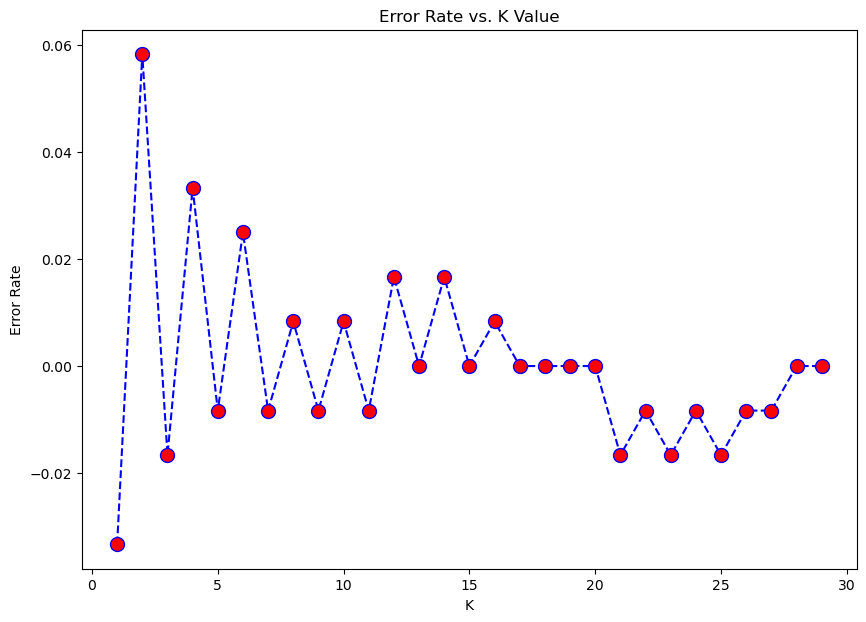

Confusion Matrix:
[[51  6]
 [ 6 57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        57
           1       0.90      0.90      0.90        63

    accuracy                           0.90       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.90      0.90      0.90       120

AUC Score: 0.899749373433584


In [88]:
# Initialize an array that stores the error rates.
error_rates = []

for a in range(1, 30):
    k = a
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    error_rates.append(np.mean(y_test - preds))
    
#plot error rates against number of neighbors
plt.figure(figsize=(10, 7))
plt.plot(range(1,30),error_rates,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.savefig('knn.png')
plt.show()

#Train classifier on the optimal k that we chose from the plot
# Create a KNN classifier with the optimal k value
knn_classifier = KNeighborsClassifier(n_neighbors= 13)

# Fit the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict the labels of the testing data
y_prediction = knn_classifier.predict(X_test)

# Compute and print the confusion matrix
c_matrix = confusion_matrix(y_test, y_prediction)
print("Confusion Matrix:")
print(c_matrix)

# Compute and print the classification report
c_report = classification_report(y_test, y_prediction)
print("Classification Report:")
print(c_report)

# Compute and print the AUC score
auc = roc_auc_score(y_test, y_prediction)
print("AUC Score:", auc)